In [2]:
library(tidyverse)
library(readr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
data <- read_csv("../input/brics-dataset/South_Africa.csv")

Rows: 10918 Columns: 2

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (1): DEXSFUS
date (1): DATE


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [4]:
typeof(data)

[1] "list"

In [5]:
spec(data)

cols(
  DATE = col_date(format = ""),
  DEXSFUS = col_double()
)

In [6]:
del_data = data[data$DATE <= as.Date("1999-12-31", "%Y-%m-%d"), ] 
data = data[data$DATE > as.Date("1999-12-31", "%Y-%m-%d"), ]

In [7]:
data = data[data$DEXSFUS != '.', ]

In [8]:
lengths(data)

DATE DEXSFUS 
   5700    5700

In [9]:
head(data, 10)

DATE,DEXSFUS
<date>,<dbl>
2000-01-03,6.1260
2000-01-04,6.0850
2000-01-05,6.0700
2000-01-06,6.0800
2000-01-07,6.0570
2000-01-10,6.0765
2000-01-11,6.0900
2000-01-12,6.0685
2000-01-13,6.0570


In [10]:
date1 = as.Date("1999-12-31", "%Y-%m-%d")
date2 = data$DATE[length(data$DATE)]     #lengthof data is 5482

In [11]:
length = date2 - date1 #7980
length

Time difference of 7980 days

In [12]:
lst_val = 1:length
lst_val <- as.double(lst_val)

In [13]:
check_date = as.Date("2000-01-01", "%Y-%m-%d")
start_val = del_data$DEXSFUS[length(del_data$DATE)]

In [14]:
if(check_date != data$DATE[1]){
    num_missing = data$DATE[1] - check_date
    val = as.numeric(start_val) + as.numeric(data$DEXSFUS[1])
    val = val/2
    for(i in 1:num_missing){
        lst_val[i] = val
    }
    check_date <- check_date + num_missing
}

In [15]:
idx = 3
for (i in 1:length(data$DATE)){    
    if(check_date != data$DATE[i]){
        num_missing <- data$DATE[i] - check_date
        val <- as.numeric(data$DEXSFUS[i-1]) + as.numeric(data$DEXSFUS[i])
        val <- val/2
        for(j in (idx : (idx + as.numeric(num_missing-1)))){
#             print(j)
            lst_val[j] <- val
        }
        
        idx <- idx + as.numeric(num_missing)
        lst_val[idx] <- as.numeric(data$DEXSFUS[i])
        idx <- idx + 1
        check_date <- check_date + num_missing + 1
#         print(check_date)
    }
    
    else{
        lst_val[idx] <- as.numeric(data$DEXSFUS[i])
        idx <- idx + 1
        check_date <- check_date + 1
    }
}

In [16]:
lst_val[1:10]

[1] 6.14300 6.14300 6.12600 6.08500 6.07000 6.08000 6.05700 6.06675 6.06675
[10] 6.07650

In [17]:
print("Enter 0 if you want the test data to start from 2020 and 1 if you want the test data to start from 2021")
offset = readline()
offset = as.integer(offset)

[1] "Enter 0 if you want the test data to start from 2020 and 1 if you want the test data to start from 2021"


 1


In [18]:
test_date = as.Date("2021-01-01", "%Y-%m-%d")
if(offset == 0){
    test_date = as.Date("2020-01-01", "%Y-%m-%d")
}

In [19]:
train = lst_val[1: as.numeric(test_date - date1) - 1]

In [20]:
test = lst_val[as.numeric(test_date - date1) : length(lst_val)]

In [21]:
train_week <- list(1 : ceiling(length(train)/7))
for(i in 0 : as.integer(length(train)/7)){
    if(i == as.integer(length(train)/7)){
        train_week[i+1] <- mean(train[((7*i)+1) : (length(train))])
        next
    }

    train_week[i+1] <- mean(train[((7*i)+1) : ((7*i)+7)])
}

In [22]:
test_week <- list(1 : ceiling(length(test)/7))

for(i in 0 : as.integer(length(test)/7)){
    if(i == as.integer(length(test)/7)){
        test_week[i+1] <- mean(test[((7*i)+1) : (length(test))])
        next
    }

    test_week[i+1] <- mean(test[((7*i)+1) : ((7*i)+7)])
}

In [23]:
train_dates = seq(as.Date("2000-01-01"), as.Date("2020-12-31"), by="week")
test_dates = seq(as.Date("2021-01-01"), as.Date("2021-11-05"), by="week")

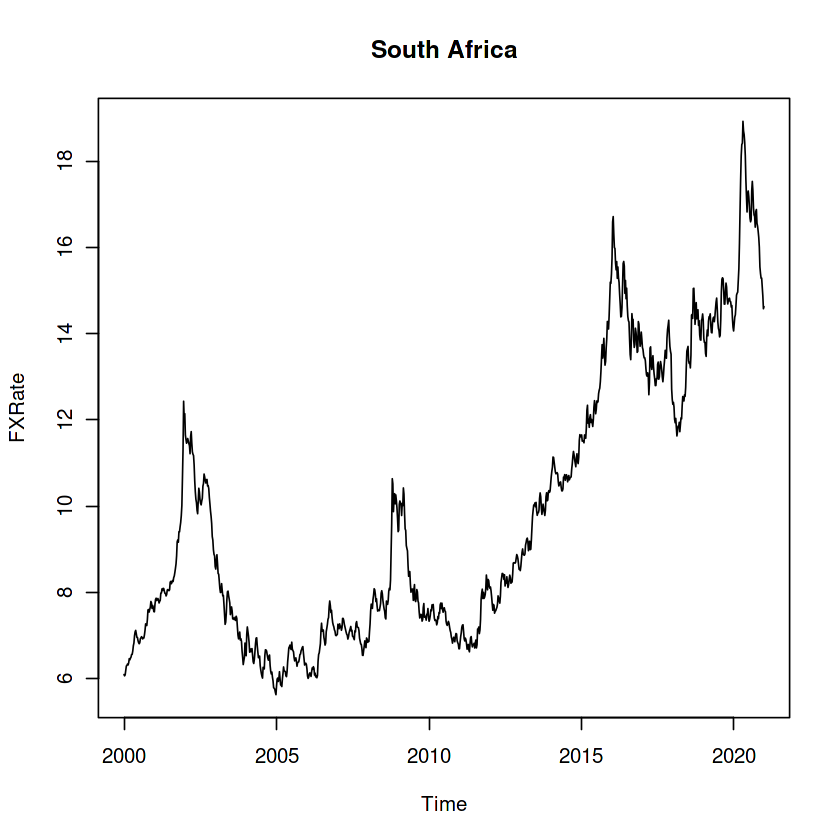

In [24]:
plot(train_dates,train_week,type="l",xlab="Time",ylab="FXRate",main="South Africa")

In [25]:
train <- ts(as.numeric(train_week))
test <- ts(as.numeric(test_week), start = length(train_week)+1,
           end = (length(train_week) + length(test_week)))
#converting to time series

In [26]:
install.packages("WaveletArima")
library(WaveletArima)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [27]:
library(tseries)
library(forecast)
library(Metrics)
library(ggplot2)
library(readr)
# library(WaveletArima)
library(caret)
library(nnfor)
library(tsDyn)
library(fracdiff)
library(bsts)
library(forecastHybrid)
library(e1071)
library(tseriesChaos)
library(pracma)
library(Kendall)
# library(nonlinearTseries)
# library(GeneCycle)
library(fpp2)


Attaching package: ‘Metrics’


The following object is masked from ‘package:forecast’:

    accuracy


Loading required package: lattice


Attaching package: ‘caret’


The following objects are masked from ‘package:Metrics’:

    precision, recall


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress


Registered S3 method overwritten by 'greybox':
  method     from
  print.pcor lava


Attaching package: ‘tsDyn’


The following object is masked from ‘package:Metrics’:

    mse


Loading required package: BoomSpikeSlab

Loading required package: Boom

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select



Attaching package: ‘Boom’


The following object is masked from ‘package:stats’:

    rWishart



Attaching package: ‘BoomSpikeSlab’


The following object is masked from ‘package:stats’:

    knots


Loading required package: zoo


A

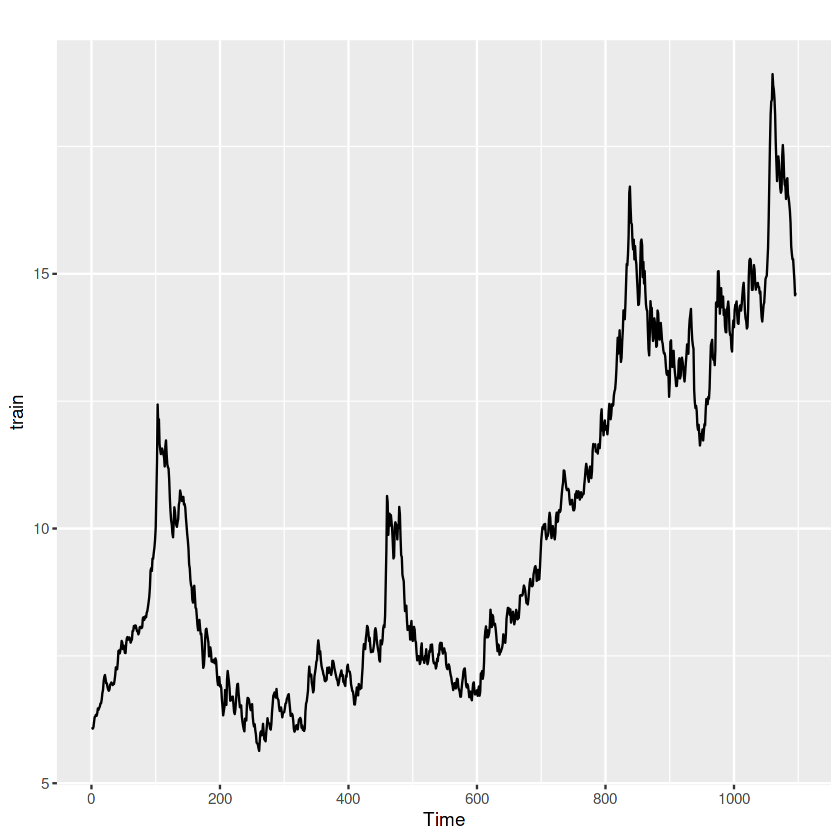

In [28]:
autoplot(train)

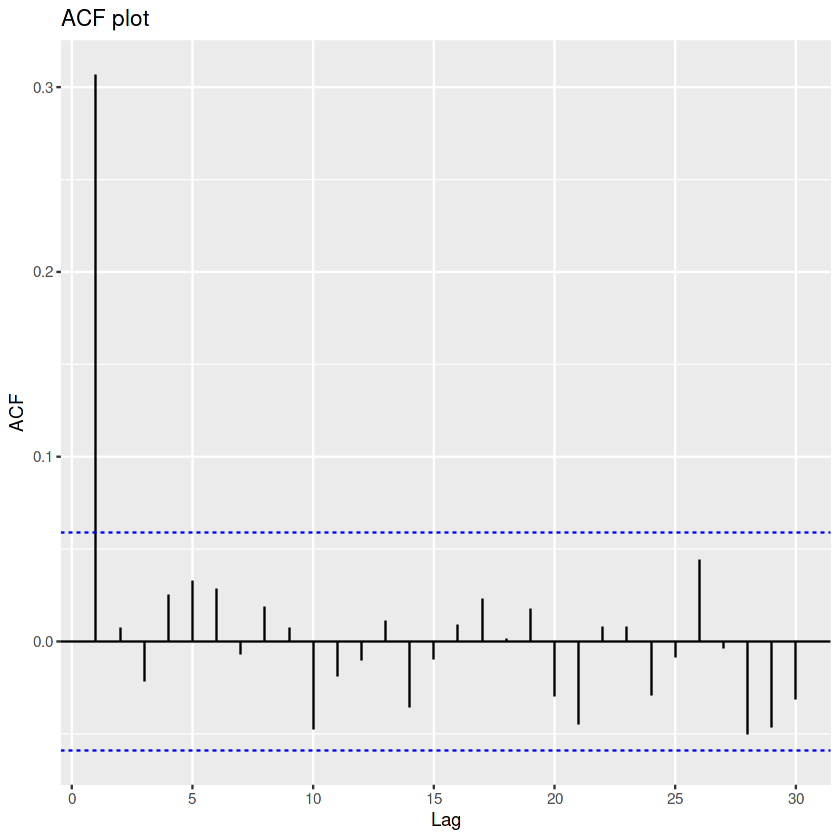

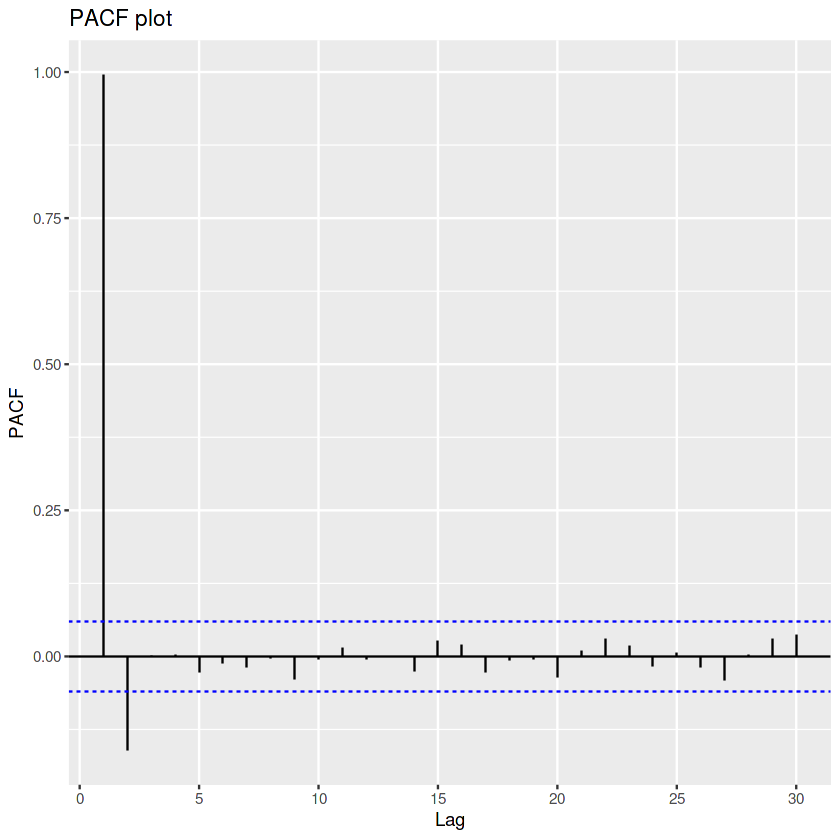

In [29]:
#ACF & PACF plots
#diffcase=ndiffs(train)
diffset = diff(train, differences = ndiffs(train))

ggAcf(diffset) +
  ggtitle("ACF plot")

ggPacf(train) +
  ggtitle("PACF plot")

In [30]:
kpss.test(train) 

Warning message in kpss.test(train):
“p-value smaller than printed p-value”



	KPSS Test for Level Stationarity

data:  train
KPSS Level = 9.4708, Truncation lag parameter = 7, p-value = 0.01


In [31]:
Box.test(train)  


	Box-Pierce test

data:  train
X-squared = 1088.2, df = 1, p-value < 2.2e-16


In [32]:
skewness(train)   #Right Skew

[1] 0.739133

In [33]:
kurtosis(train)   #Peaked distribution

[1] -0.6611229

In [34]:
hurstexp(train)  #Emperical

Simple R/S Hurst estimation:         0.8741194 
Corrected R over S Hurst exponent:   1.008835 
Empirical Hurst exponent:            0.9308451 
Corrected empirical Hurst exponent:  0.9124102 
Theoretical Hurst exponent:          0.5381524 


In [35]:
terasvirta.test(train) 
#Also a test for linearity... p-value is greater than 0.05, hence linear trend


	Teraesvirta Neural Network Test

data:  train
X-squared = 4.012, df = 2, p-value = 0.1345


In [36]:
#Non-Chaotic
max_lyapunov_expo <-lyap_k(train, m=1, d=2, s=1, t=4, ref=length(train), k=2, eps=4); max_lyapunov_expo

Finding nearests
Keeping  1096  reference points
Following points


A Time Series:
[1] -5.254403

# **Models**

Series: train 
ARIMA(0,1,1) 

Coefficients:
         ma1
      0.3265
s.e.  0.0274

sigma^2 estimated as 0.03334:  log likelihood=308.72
AIC=-613.44   AICc=-613.43   BIC=-603.44

Training set error measures:
                      ME      RMSE      MAE        MPE     MAPE      MASE
Training set 0.005899132 0.1824311 0.129258 0.05037158 1.304146 0.9423704
                    ACF1
Training set 0.009333349

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.005899132,0.1824311,0.1292580,0.05037158,1.304146,0.9423704,0.009333349,NA
Test set,-0.053359943,0.4363771,0.3557652,-0.45470906,2.459896,2.5937472,0.805147708,1.738207


[1] 0.0244159

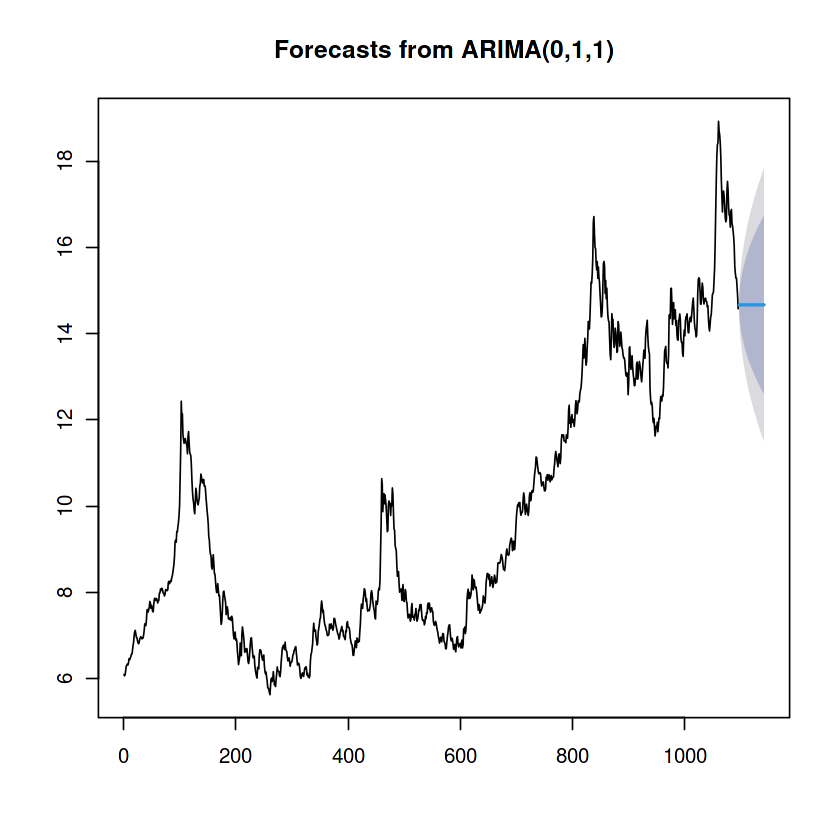

In [37]:
#ARIMA - Classical
fitARIMA = auto.arima(train) 
summary(fitARIMA)
predARIMA = forecast::forecast(fitARIMA,h=length(test))
plot(predARIMA)

a1<-forecast::accuracy(predARIMA, test);a1
smape(test,predARIMA$mean)

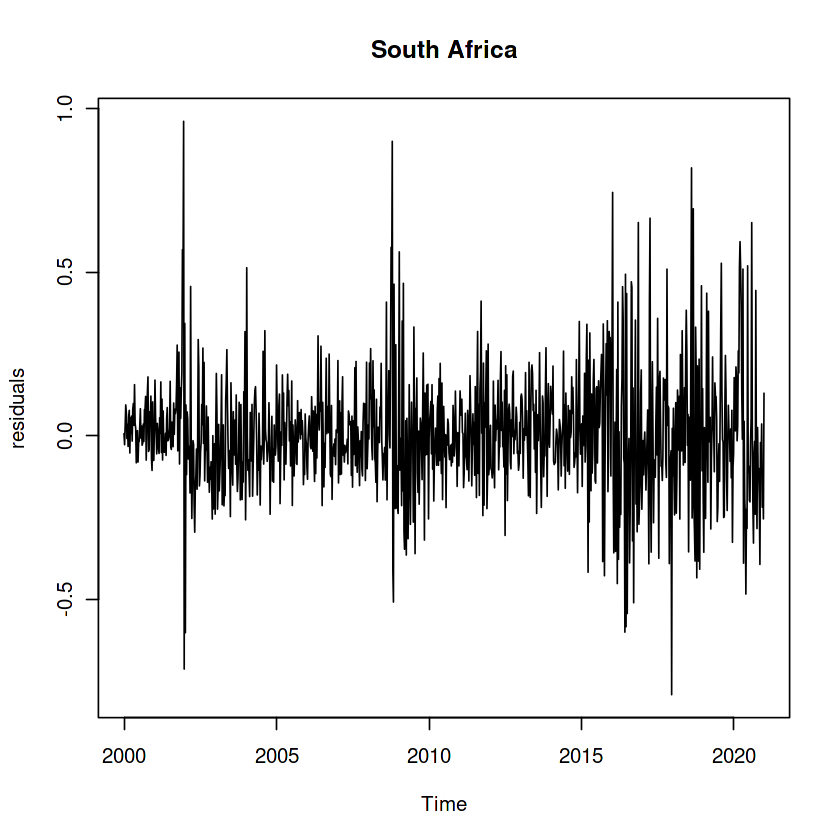

In [38]:
plot(train_dates,fitARIMA$residuals,type="l",xlab="Time",ylab="residuals",main="South Africa")

ETS(M,Ad,N) 

Call:
 ets(y = train) 

  Smoothing parameters:
    alpha = 0.9999 
    beta  = 0.1782 
    phi   = 0.8 

  Initial states:
    l = 5.8139 
    b = 0.1216 

  sigma:  0.0181

     AIC     AICc      BIC 
3769.574 3769.651 3799.570 

Training set error measures:
                      ME      RMSE       MAE        MPE     MAPE      MASE
Training set 0.004297775 0.1885835 0.1346765 0.03836158 1.358751 0.9818744
                  ACF1
Training set 0.1780419

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.004297775,0.1885835,0.1346765,0.03836158,1.358751,0.9818744,0.1780419,NA
Test set,0.223645094,0.4727707,0.3979635,1.44618721,2.704065,2.9013990,0.7916711,1.825624


[1] 0.02733002

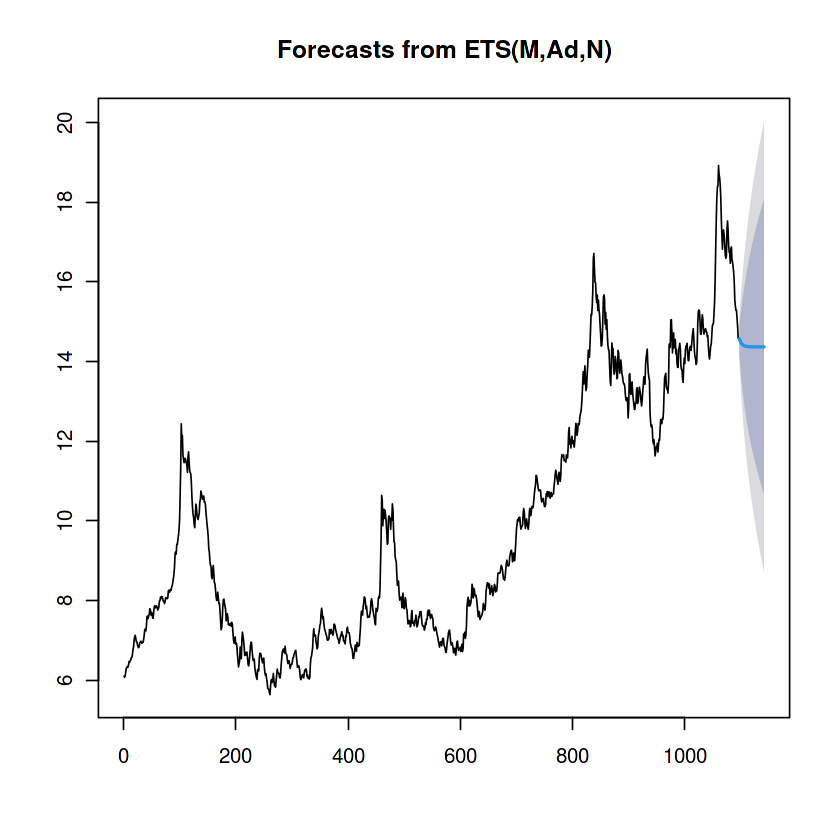

In [41]:
# fitting ETS  -- Smoothing Basic
fitETS=ets(train)
summary(fitETS)
predETS=forecast::forecast(fitETS, h=length(test))
plot(predETS)

a2<-forecast::accuracy(predETS, test);a2
smape(test,predETS$mean)

Warning message:
“Possible unit root in the low  regime. Roots are: 0.996 2.7527 2.7527 7.946”


,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.4323249,0.6255207,0.5229666,2.879282,3.538576,0.8068165,2.405238


[1] 0.03619382

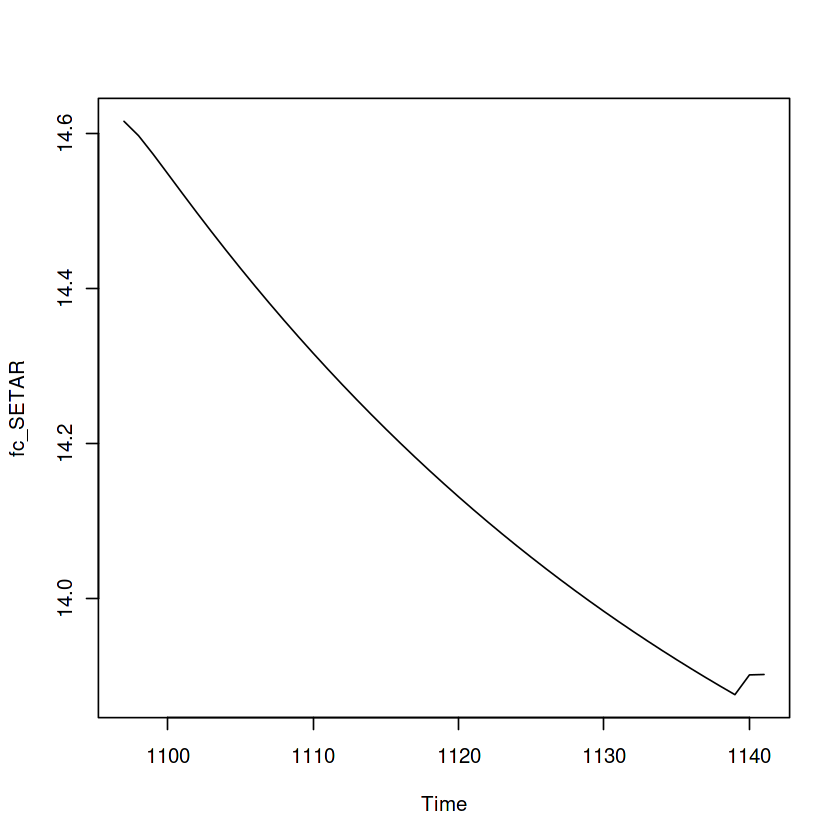

In [42]:
#SETAR - Classical
fit_SETAR = setar(train, m=4)
fc_SETAR = predict(fit_SETAR, n.ahead = length(test))
plot(fc_SETAR)
#How to determine M?

a3<-forecast::accuracy(fc_SETAR, test);a3
smape(test, fc_SETAR)

                  Length Class  Mode     
lambda               1   -none- numeric  
alpha                1   -none- numeric  
beta                 1   -none- numeric  
damping.parameter    1   -none- numeric  
gamma.values         0   -none- NULL     
ar.coefficients      0   -none- NULL     
ma.coefficients      0   -none- NULL     
likelihood           1   -none- numeric  
optim.return.code    1   -none- numeric  
variance             1   -none- numeric  
AIC                  1   -none- numeric  
parameters           2   -none- list     
seed.states          2   -none- numeric  
fitted.values     1096   ts     numeric  
errors            1096   ts     numeric  
x                 2192   -none- numeric  
seasonal.periods     0   -none- NULL     
y                 1096   ts     numeric  
call                 2   -none- call     
series               1   -none- character
method               1   -none- character

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.003703626,0.1824001,0.1293136,0.0202978,1.305722,0.9427759,0.00362941,NA
Test set,-0.071234557,0.4402672,0.3570912,-0.5773833,2.471910,2.6034146,0.80648066,1.756413


[1] 0.02450616

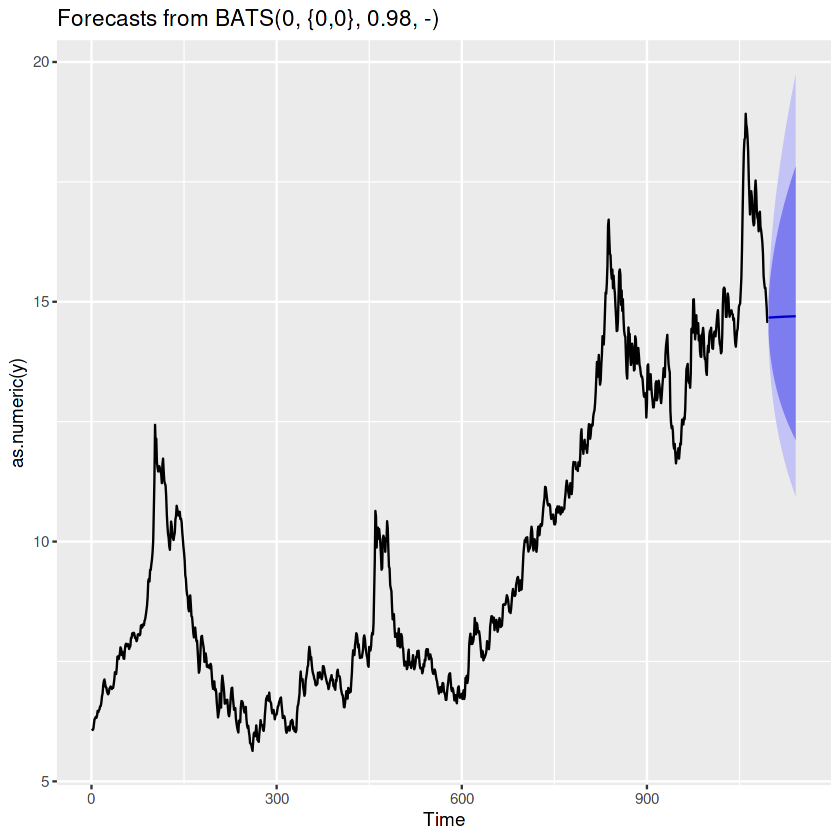

In [43]:
#TBATS - Smotthing
fit_tbats = tbats(train)
summary(fit_tbats)
predTBATS=forecast::forecast(fit_tbats, h=length(test))
autoplot(predTBATS)

a4<-forecast::accuracy(predTBATS, test);a4
smape(test,predTBATS$mean)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,-0.1008785,0.4508887,0.3613996,-0.7808167,2.505909,0.8119011,1.79946


[1] 0.02480146

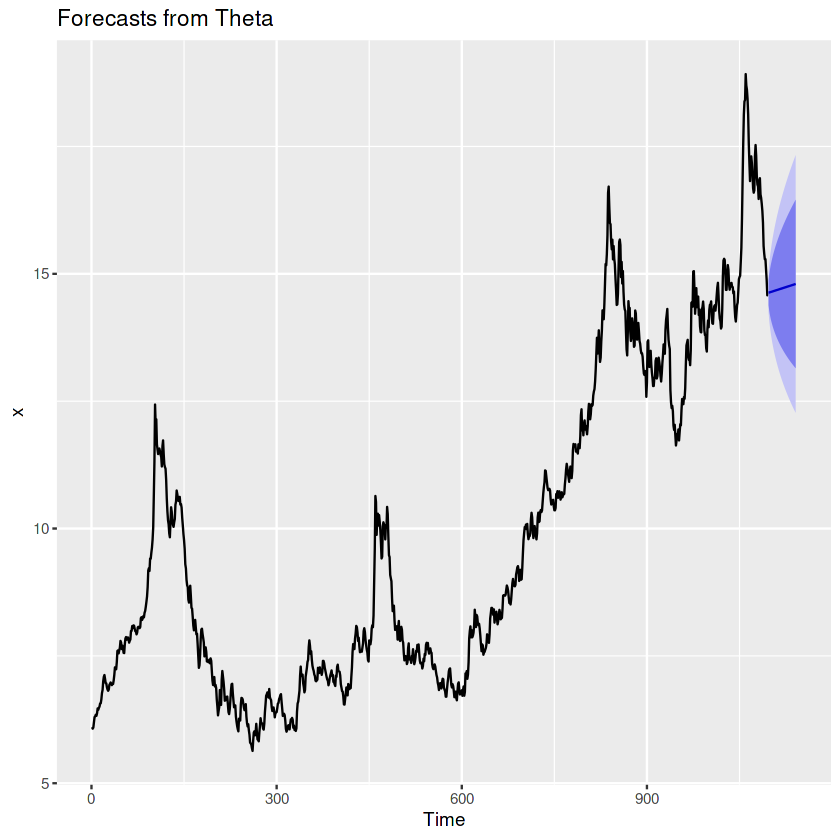

In [44]:
#Theta -- Smotthing
fit_theta=thetaf(train, h=length(test))
autoplot(fit_theta)

a5<-forecast::accuracy(fit_theta$mean, test);a5
smape(test,fit_theta$mean)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.3164098,0.5887008,0.4639586,2.083482,3.148704,0.8258494,2.272228


[1] 0.03211175

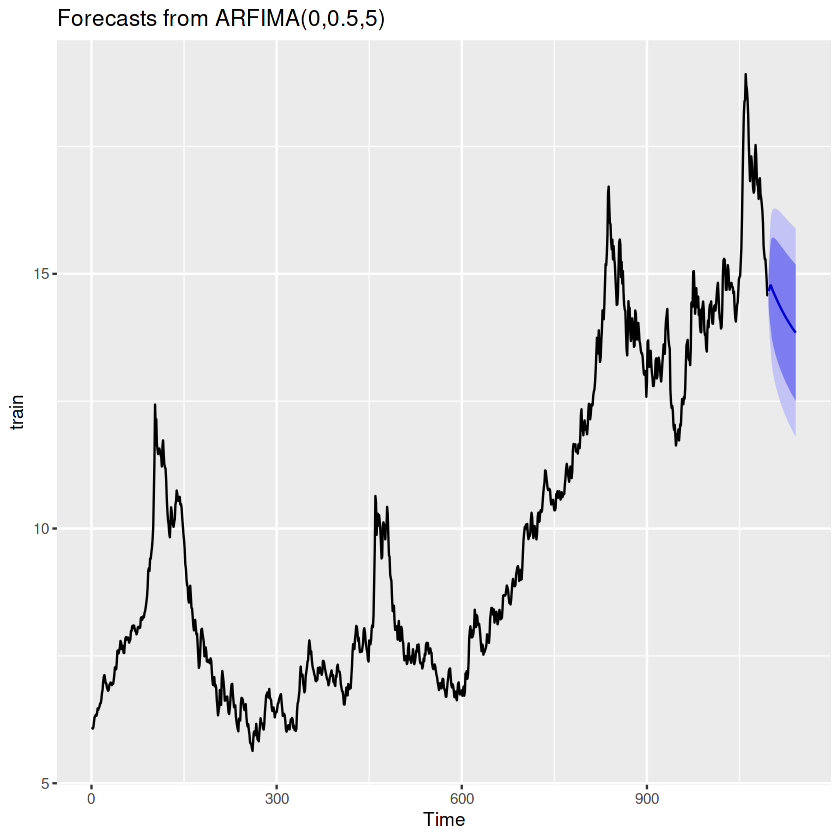

In [45]:
#ARFIMA model -- Classical
fit_ARFIMA=arfima(train)
predARFIMA = forecast::forecast(fit_ARFIMA, h=length(test))
autoplot(predARFIMA)

a6<-forecast::accuracy(predARFIMA$mean, test);a6
smape(test,predARFIMA$mean)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,-0.2033433,0.4899706,0.3857252,-1.483307,2.688011,0.8169648,1.968833


[1] 0.02644232

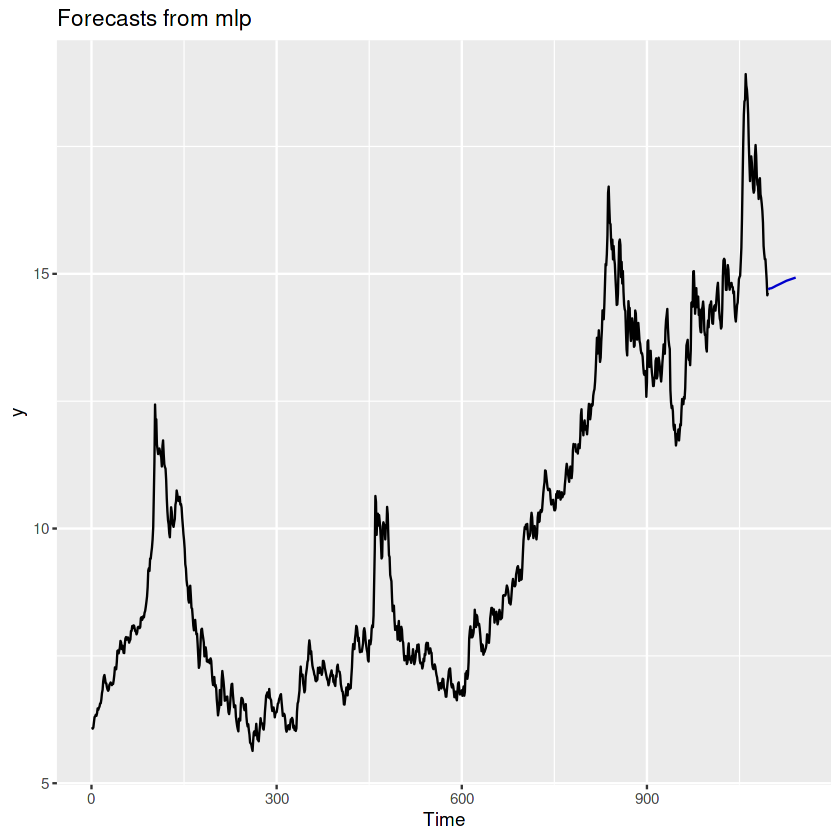

In [50]:
#fitting ANN -- ML Model
fit_ANN = mlp(train)
predANN = forecast::forecast(fit_ANN, h=length(test))
autoplot(predANN)

a7<-forecast::accuracy(predANN$mean, test);a7
smape(test,predANN$mean)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.04400632,0.4315825,0.3571697,0.2132087,2.453466,0.8004791,1.700413


[1] 0.02451467

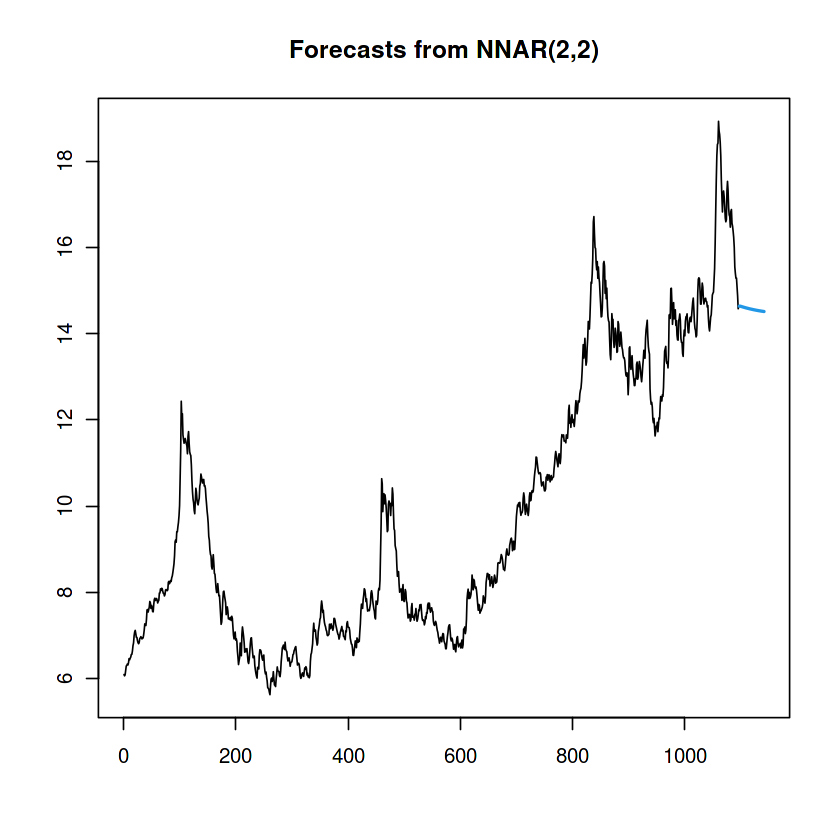

In [48]:
#fitting ARNN model -- ML Model
fit_ARNN = nnetar(train)
predARNN=forecast::forecast(fit_ARNN, h= length(test))
plot(predARNN)

a8<-forecast::accuracy(predARNN$mean, test);a8
smape(test, predARNN$mean)

Warning message in preprocess(y, m, lags, keep, difforder, sel.lag, allow.det.season, :
“No inputs left in the network after pre-selection, forcing AR(1).”


,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,-0.05254194,0.4358148,0.3551695,-0.4490095,2.455683,0.8046856,1.736627


[1] 0.02437532

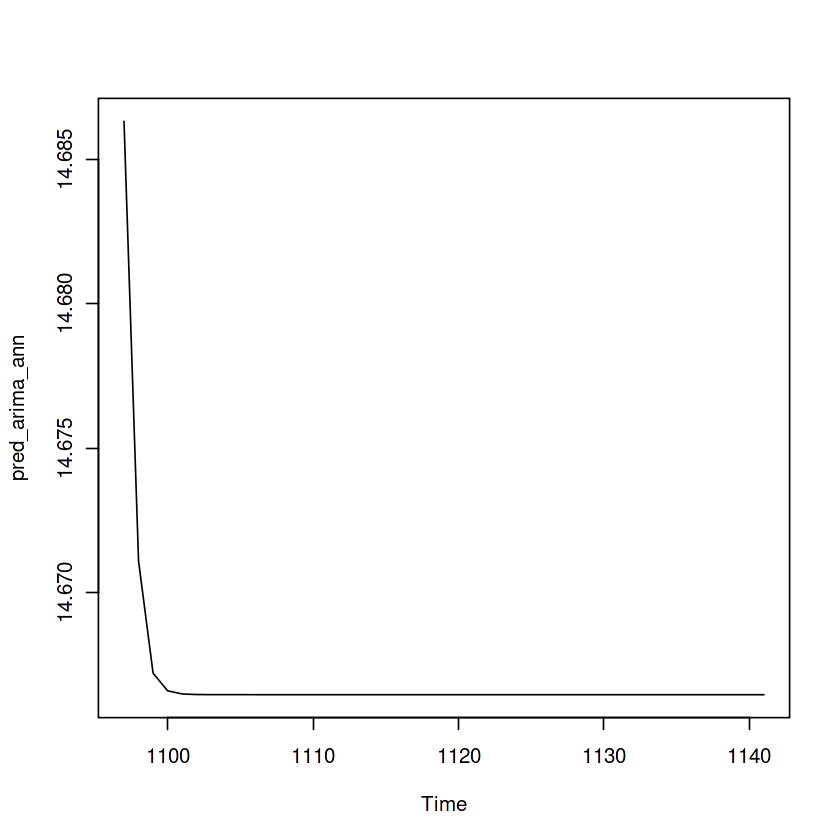

In [51]:
#fitting ARIMA + ANN hyybrid
fit_res_ANN=mlp(fitARIMA$residuals)
pred_res_ANN = forecast::forecast(fit_res_ANN, h=length(test))
pred_arima_ann=predARIMA$mean+pred_res_ANN$mean
plot(pred_arima_ann)

a9<-forecast::accuracy(pred_arima_ann, test);a9
smape(test,pred_arima_ann)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,-0.05326491,0.4359615,0.3551856,-0.4539716,2.455903,0.80451,1.737466


[1] 0.02437642

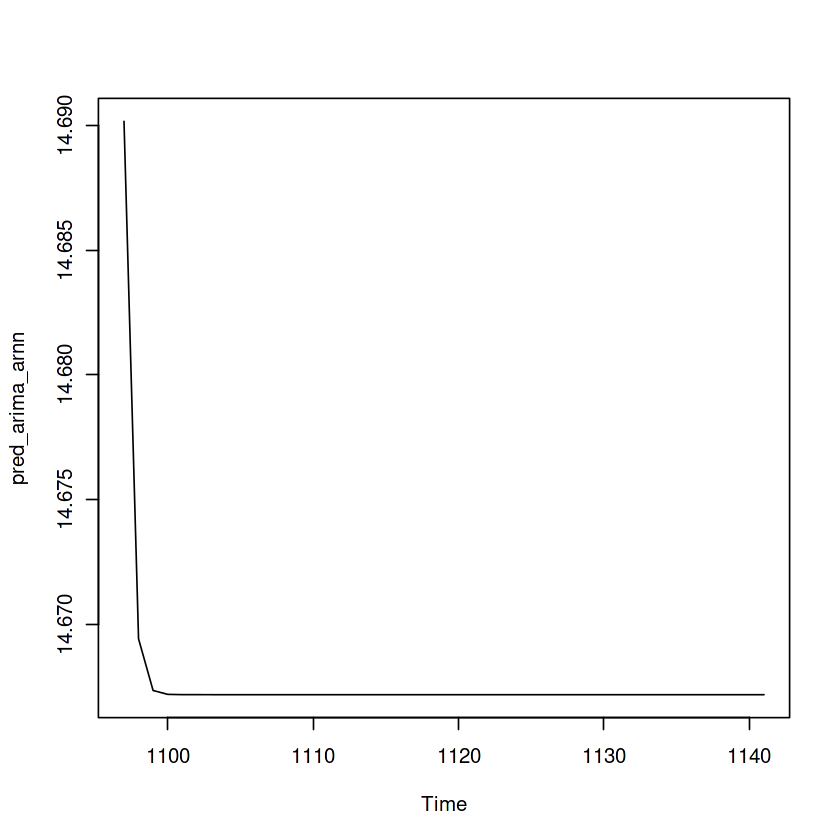

In [52]:
#fitting ARIMA + ARNN hybrid
fit_res_ARNN=nnetar(fitARIMA$residuals)
pred_res_ARNN = forecast::forecast(fit_res_ARNN, h=length(test))
pred_arima_arnn=predARIMA$mean+pred_res_ARNN$mean
plot(pred_arima_arnn)

a10<-forecast::accuracy(pred_arima_arnn, test);a10
smape(test,pred_arima_arnn)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.03772689,0.4298406,0.3537897,0.1701503,2.431012,0.8027658,1.692271


[1] 0.02428059

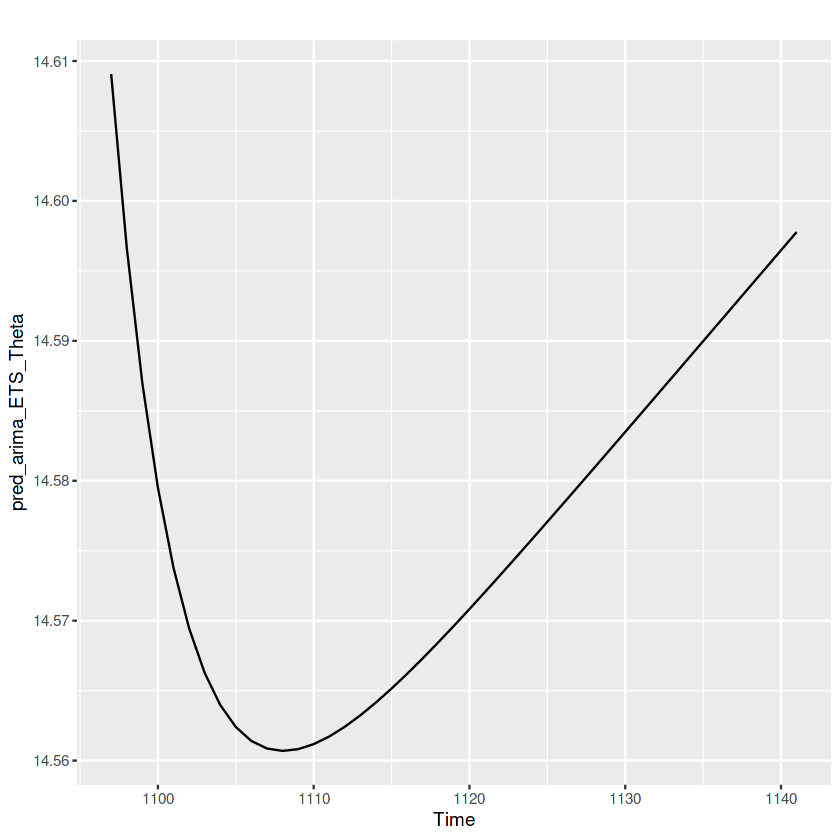

In [53]:
#ARIMA+ETS+THETA
pred_arima_ETS_Theta = ((0.333*predARIMA$mean) + (0.333*predETS$mean) + (0.333*fit_theta$mean))
autoplot(pred_arima_ETS_Theta)

a11<-forecast::accuracy(pred_arima_ETS_Theta, test);a11
smape(test,pred_arima_ETS_Theta)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.08597353,0.434389,0.3612374,0.5011607,2.474255,0.7991778,1.701651


[1] 0.02479239

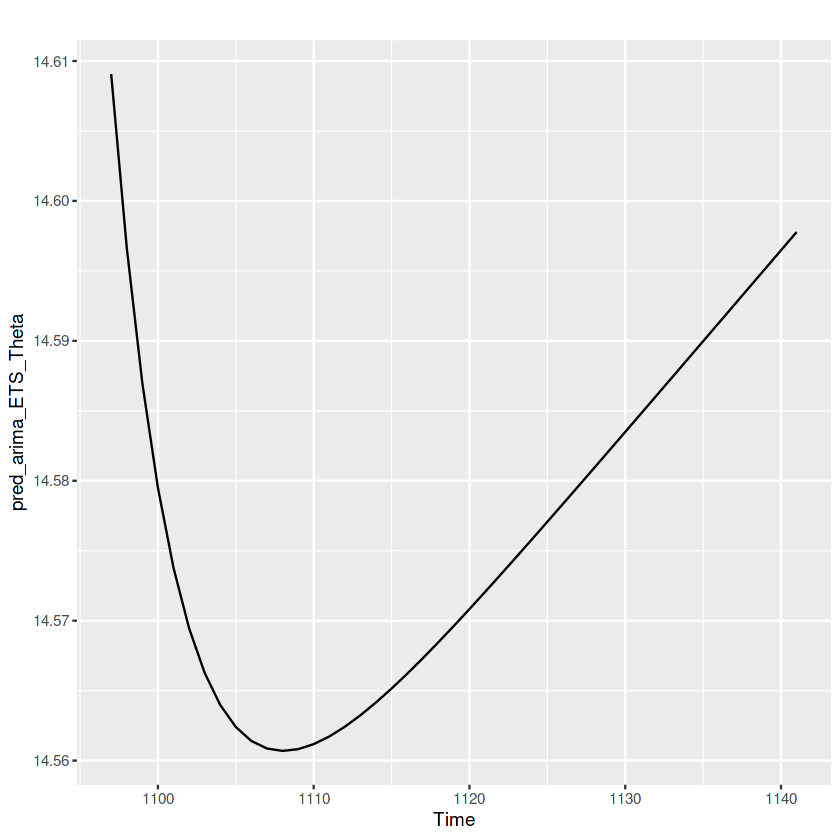

In [54]:
#ARIMA+ETS+ARNN
pred_arima_ETS_ARNN = ((0.333*predARIMA$mean) + (0.333*predETS$mean) + (0.333*predARNN$mean))
autoplot(pred_arima_ETS_Theta)

a12<-forecast::accuracy(pred_arima_ETS_ARNN, test);a12
smape(test,pred_arima_ETS_ARNN)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,-0.02209282,0.4330155,0.3558051,-0.2404316,2.454863,0.8050127,1.717396


[1] 0.0244188

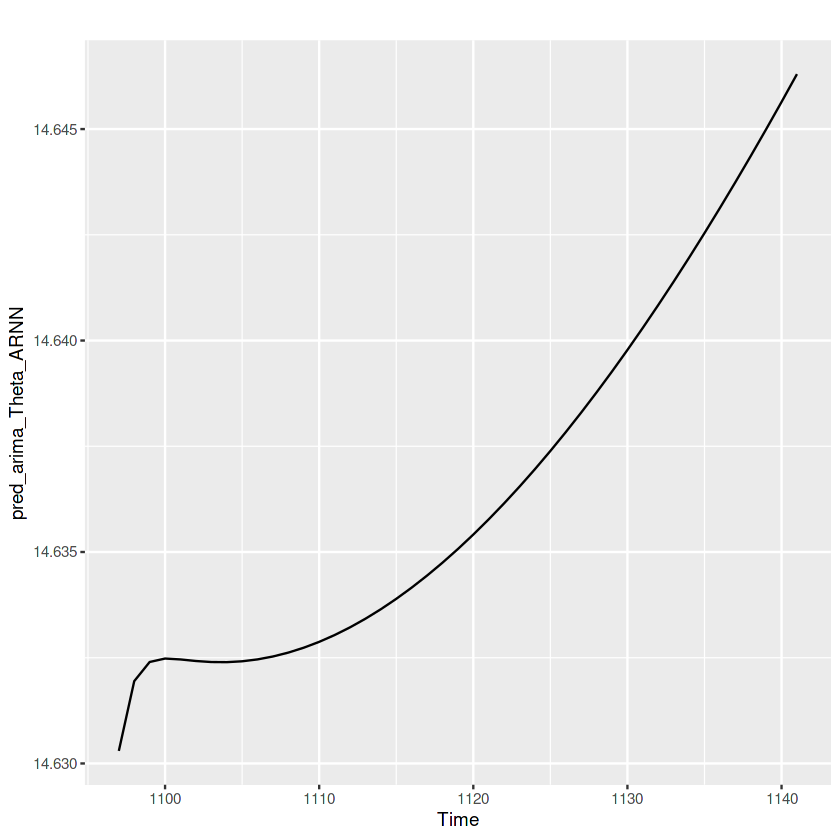

In [55]:
#ARIMA+theta+ARNN
pred_arima_Theta_ARNN = ((0.333*predARIMA$mean) + (0.333*fit_theta$mean) + (0.333*predARNN$mean))
autoplot(pred_arima_Theta_ARNN)

a13<-forecast::accuracy(pred_arima_Theta_ARNN, test);a13
smape(test,pred_arima_Theta_ARNN)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.07014986,0.4321008,0.3582343,0.3925669,2.456148,0.8007383,1.694588


[1] 0.0245852

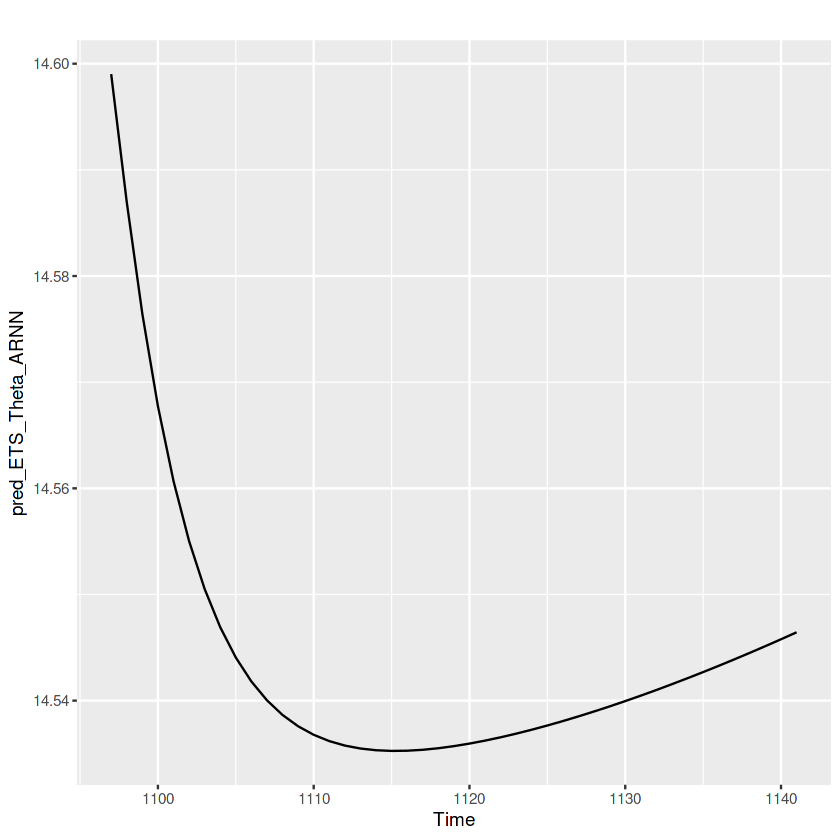

In [56]:
#ETS+theta+ARNN
pred_ETS_Theta_ARNN = ((0.333*predETS$mean) + (0.333*fit_theta$mean) + (0.333*predARNN$mean))
autoplot(pred_ETS_Theta_ARNN)

a14<-forecast::accuracy(pred_ETS_Theta_ARNN, test);a14
smape(test,pred_ETS_Theta_ARNN)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,1.207803,1.484395,1.207803,8.1986,8.1986,0.8992503,5.7398


[1] 0.0874017

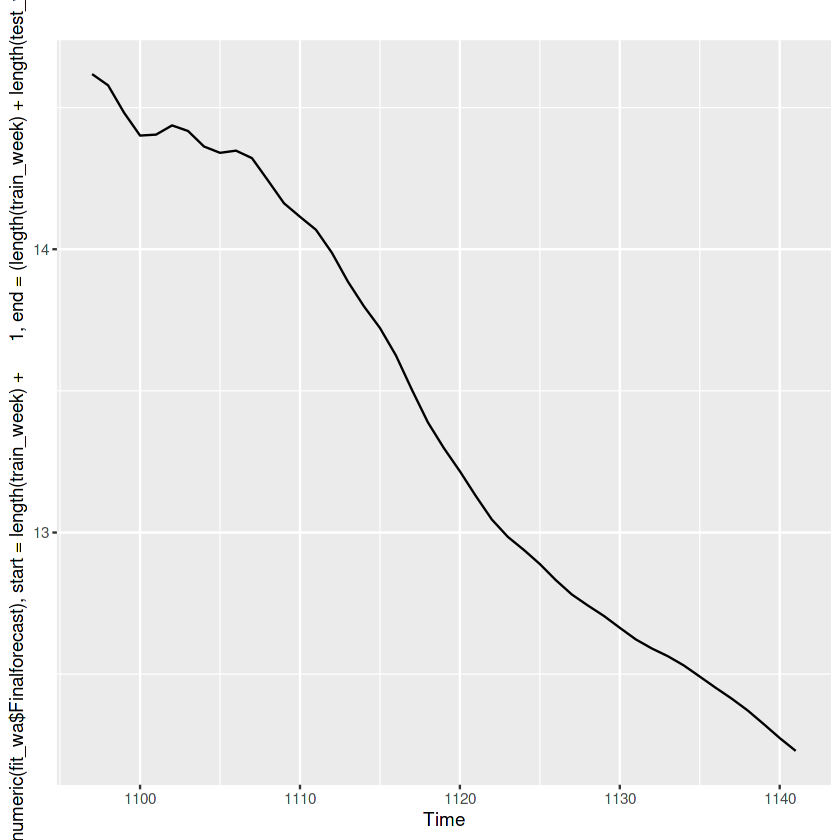

In [57]:
#WaveletArima -- Advanced
fit_wa <- WaveletFittingarma(train, Waveletlevels = floor(log(length(train))), boundary = 'periodic', FastFlag = TRUE, MaxARParam = 5, MaxMAParam = 5, NForecast = length(test))
autoplot(ts(as.numeric(fit_wa$Finalforecast), start = length(train_week)+1, end = (length(train_week) + length(test_week))))

a15<-forecast::accuracy(fit_wa$Finalforecast, test);a15
smape(test,fit_wa$Finalforecast)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.07014986,0.4321008,0.3582343,0.3925669,2.456148,0.8007383,1.694588


[1] 0.0245852

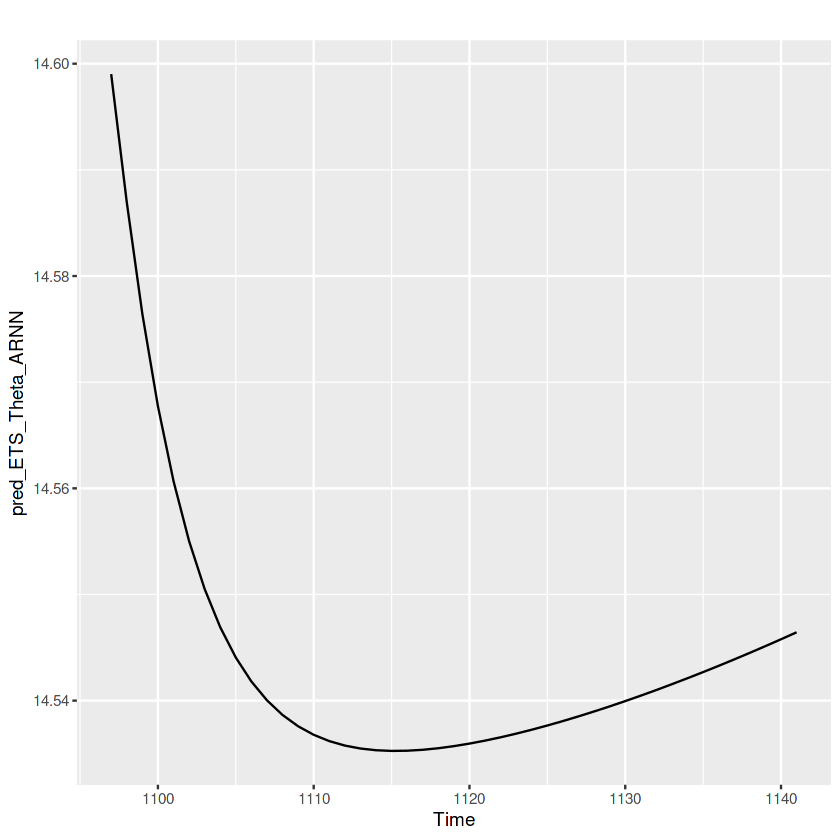

In [58]:
#ANN+ARNN+WARIMA
pred_ANN_ARNN_WARIMA = ((0.333*predANN$mean) + (0.333*fit_wa$Finalforecast) + (0.333*predARNN$mean))
autoplot(pred_ETS_Theta_ARNN)

a14<-forecast::accuracy(pred_ETS_Theta_ARNN, test);a14
smape(test,pred_ETS_Theta_ARNN)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,1.218258,1.458045,1.218258,8.268957,8.268957,0.8883224,5.636666


[1] 0.08789569

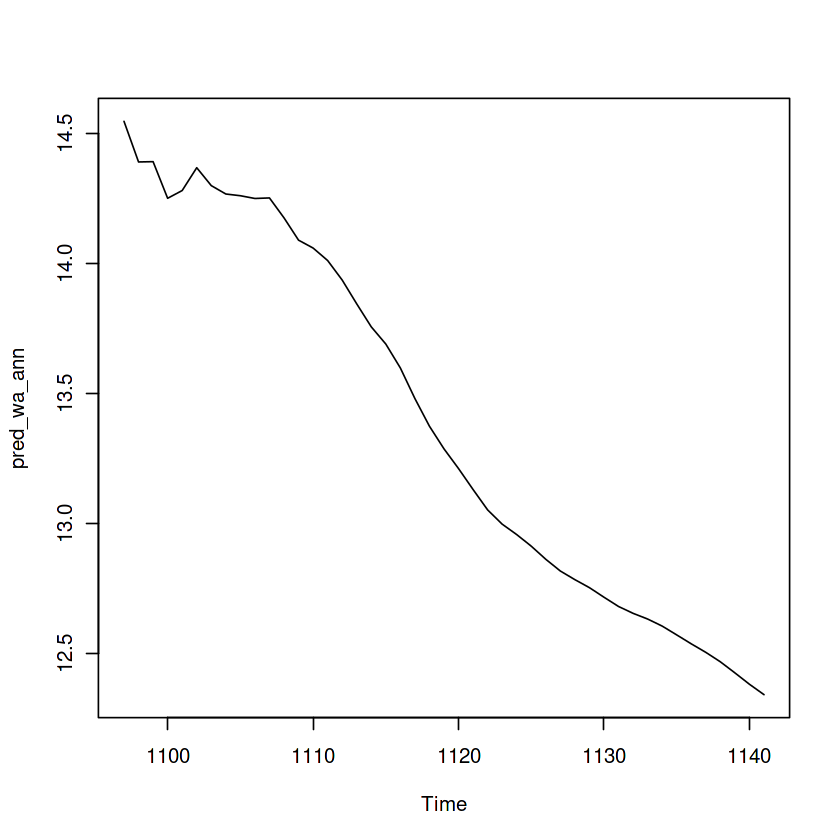

In [59]:
#fitting WARIMA+ANN hybrid model
res_wa = train - fit_wa$FinalPrediction
fit_wa_ANN=mlp(res_wa)
pred_wa_ANN = forecast::forecast(fit_wa_ANN, h=length(test))
pred_wa_ann=fit_wa$Finalforecast+pred_wa_ANN$mean
a16<-forecast::accuracy(pred_wa_ann, test);a16
plot(pred_wa_ann)

smape(test,pred_wa_ann)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,1.177152,1.458211,1.177152,7.987614,7.987614,0.8959337,5.63793


[1] 0.0850947

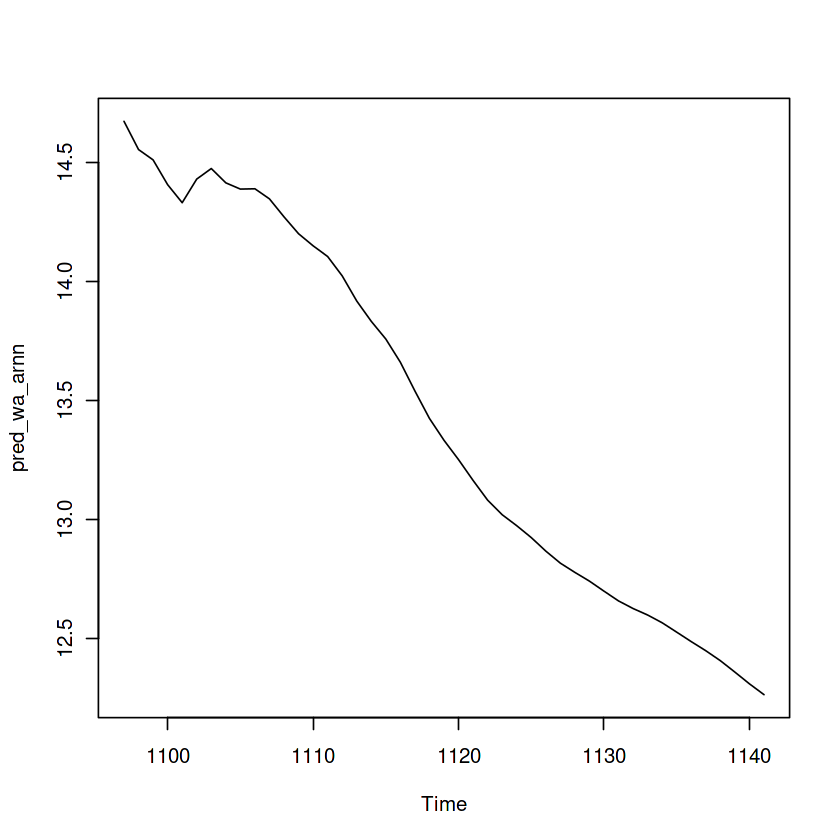

In [60]:
#fitting WARIMA + ARNN hybrid model
fit_wa_ARNN = nnetar(res_wa)
pred_wa_ARNN = forecast::forecast(fit_wa_ARNN, h=length(test))
pred_wa_arnn=fit_wa$Finalforecast+pred_wa_ARNN$mean
a17<-forecast::accuracy(pred_wa_arnn, test);a17
plot(pred_wa_arnn)

smape(test,pred_wa_arnn)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,-0.02040281,0.4397194,0.3622161,-0.2301335,2.498686,0.8143187,1.736974


[1] 0.02485777

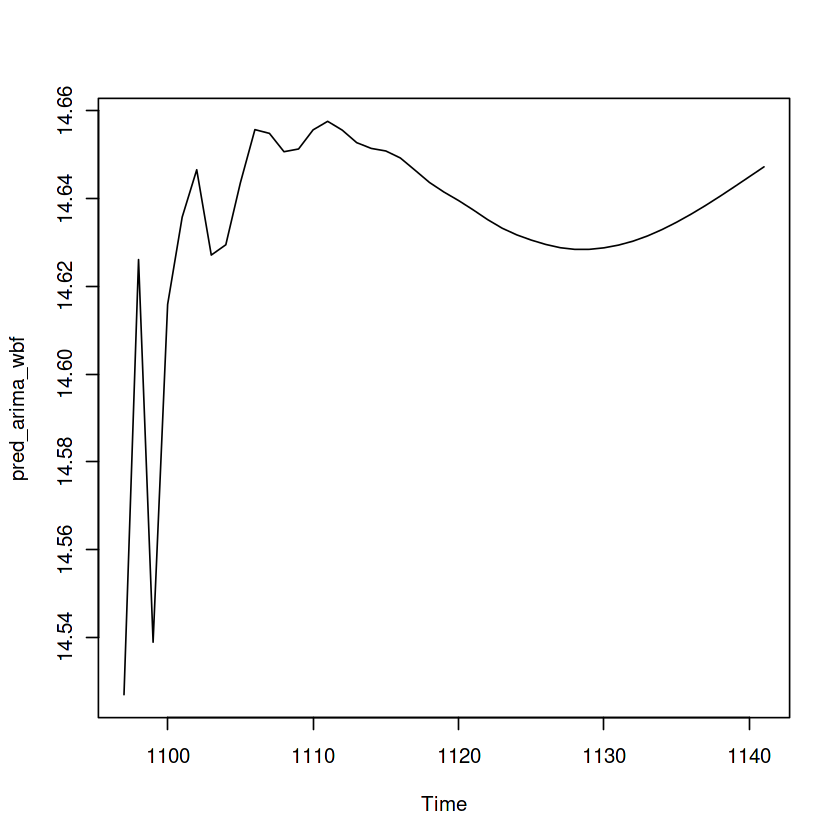

In [61]:
#fitting ARIMA + WARIMA hybrid model
fit_res_wbf=WaveletFittingarma(fitARIMA$residuals, Waveletlevels = floor(log(length(train))), boundary = 'periodic', FastFlag = TRUE, MaxARParam = 5, MaxMAParam = 5, NForecast = length(test))

pred_arima_wbf=predARIMA$mean+fit_res_wbf$Finalforecast
a18<-forecast::accuracy(pred_arima_wbf, test);a18
plot(pred_arima_wbf)

smape(test,pred_arima_wbf)

=-=-=-=-= Iteration 0 Tue Dec 21 14:45:30 2021 =-=-=-=-=
=-=-=-=-= Iteration 900 Tue Dec 21 14:45:37 2021 =-=-=-=-=
=-=-=-=-= Iteration 1800 Tue Dec 21 14:45:45 2021 =-=-=-=-=
=-=-=-=-= Iteration 2700 Tue Dec 21 14:45:52 2021 =-=-=-=-=
=-=-=-=-= Iteration 3600 Tue Dec 21 14:46:00 2021 =-=-=-=-=
=-=-=-=-= Iteration 4500 Tue Dec 21 14:46:07 2021 =-=-=-=-=
=-=-=-=-= Iteration 5400 Tue Dec 21 14:46:15 2021 =-=-=-=-=
=-=-=-=-= Iteration 6300 Tue Dec 21 14:46:22 2021 =-=-=-=-=
=-=-=-=-= Iteration 7200 Tue Dec 21 14:46:30 2021 =-=-=-=-=
=-=-=-=-= Iteration 8100 Tue Dec 21 14:46:38 2021 =-=-=-=-=


,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.8796818,1.086905,0.8919265,5.941425,6.031599,0.8593115,4.18522


[1] 0.06313065

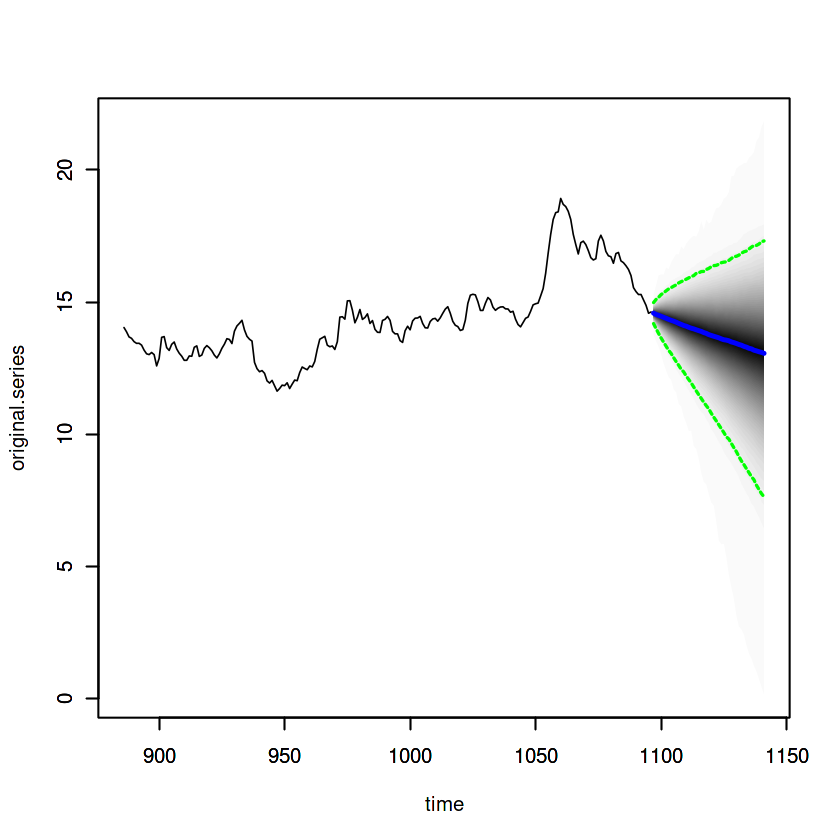

In [62]:
#fitting BSTS model -- Advanced
ss <- AddLocalLinearTrend(list(), train)
fit_bsts=bsts(train,state.specification = ss, niter = 9000)
predBSTS <- predict(fit_bsts, horizon = length(test))
plot(predBSTS, plot.original = 211)

burn <- SuggestBurn(0.1, fit_bsts)
fitted_bsts=as.numeric(-colMeans(fit_bsts$one.step.prediction.errors[-(1:burn),])+train)

a19<-forecast::accuracy(predBSTS$mean, test);a19
smape(test,predBSTS$mean)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,-0.01094365,0.4332406,0.3565025,-0.1642151,2.457813,0.8051477,1.71606


[1] 0.02446646

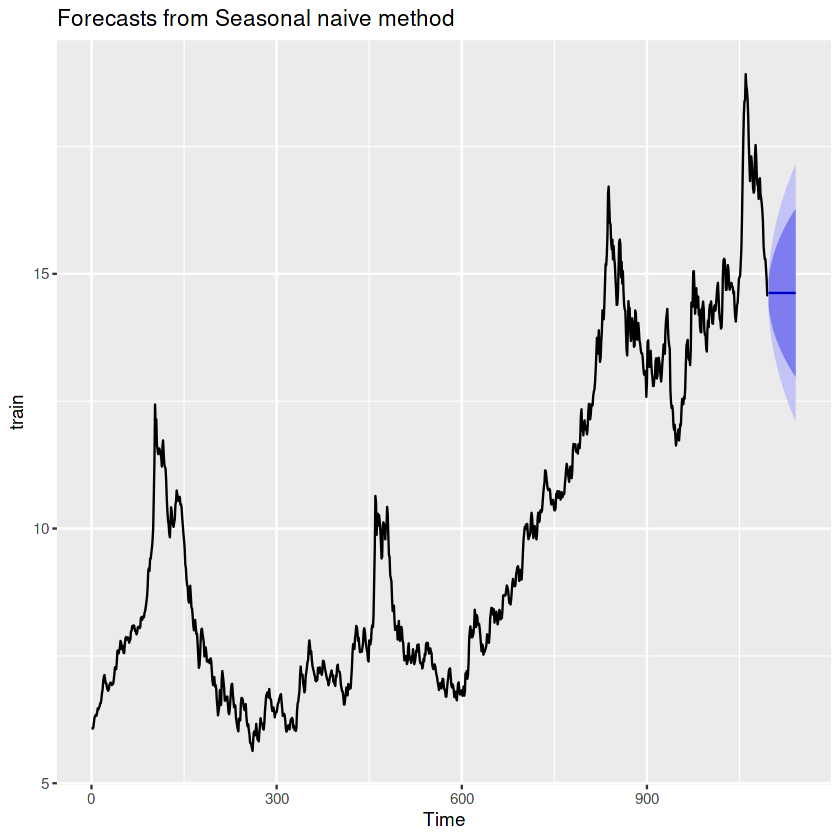

In [63]:
#Snaive - ARIMA(0,0,0)(0,1,0)m  --  Classical
fit_snaive = snaive(train, h=length(test))
autoplot(fit_snaive)

a20<-forecast::accuracy(fit_snaive$mean, test);a20
smape(test,fit_snaive$mean)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,-0.01093897,0.4332405,0.3565026,-0.1641831,2.457813,0.8051477,1.716059


[1] 0.02446646

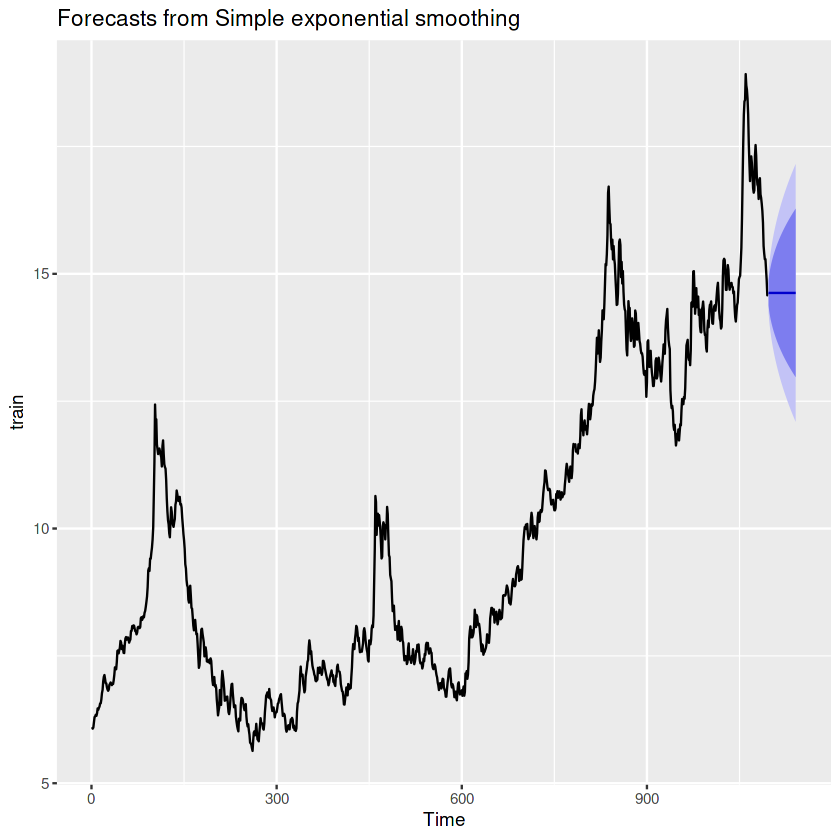

In [64]:
#Ses --  Simple exponential smoothing
fit_ses = ses(train, h=length(test))
autoplot(fit_ses)

a21<-forecast::accuracy(fit_ses$mean, test);a21
smape(test,fit_ses$mean)

**Catboost**

In [65]:
# Importing Catboost
failed_loading_catboost = FALSE
tryCatch(library(catboost), error = function(err) {failed_loading_catboost<<-TRUE})

In [66]:
lag = 2

In [67]:
# Initializing Catboost parameters
embedded_series <- NULL
series_means <- NULL
mean <- mean(train)
train_cat <- train/mean
series_means <- c(series_means, mean)
embedded <- embed(train_cat, lag + 1)
embedded_series <- rbind(embedded_series, embedded)

final_lags <- NULL
current_series_final_lags <- t(as.matrix(rev(tail(train_cat, lag))))
final_lags_cat <- rbind(final_lags, current_series_final_lags)

In [68]:
# Fitting the CatBoost model
if (failed_loading_catboost) stop("Error when loading catboost, cannot run global model based on catboost")
    train_pool <- catboost.load_pool(data = as.matrix(embedded_series[,-1]),label=as.matrix(embedded_series[,1]))
    model_cat <- catboost.train(train_pool)

Training catboost with default parameters! See help(catboost.train).



Learning rate set to 0.039659
0:	learn: 0.3113381	total: 50.9ms	remaining: 50.8s
1:	learn: 0.3000576	total: 52.9ms	remaining: 26.4s
2:	learn: 0.2889292	total: 54.9ms	remaining: 18.3s
3:	learn: 0.2783612	total: 56.9ms	remaining: 14.2s
4:	learn: 0.2682017	total: 59ms	remaining: 11.7s
5:	learn: 0.2585257	total: 59.5ms	remaining: 9.86s
6:	learn: 0.2490632	total: 60.1ms	remaining: 8.52s
7:	learn: 0.2397688	total: 60.6ms	remaining: 7.52s
8:	learn: 0.2309115	total: 61.2ms	remaining: 6.74s
9:	learn: 0.2224097	total: 62ms	remaining: 6.14s
10:	learn: 0.2143264	total: 62.7ms	remaining: 5.63s
11:	learn: 0.2066018	total: 63.4ms	remaining: 5.22s
12:	learn: 0.1990435	total: 64.1ms	remaining: 4.86s
13:	learn: 0.1917741	total: 64.8ms	remaining: 4.56s
14:	learn: 0.1848351	total: 65.5ms	remaining: 4.3s
15:	learn: 0.1781054	total: 66.6ms	remaining: 4.1s
16:	learn: 0.1716596	total: 67.2ms	remaining: 3.89s
17:	learn: 0.1655750	total: 67.9ms	remaining: 3.7s
18:	learn: 0.1596739	total: 68.9ms	remaining: 3.56s

In [69]:
# Predictions in Catboost model
predictions <- NULL
for (i in 1:length(test)){
    catboost_final_lags <- catboost.load_pool(final_lags_cat)
    new_predictions <- catboost.predict(model_cat, catboost_final_lags)
    predictions <- cbind(predictions, new_predictions)
    if(i < length(test)){
      final_lags_cat <- final_lags_cat[-lag]
      final_lags_cat <- cbind(new_predictions, final_lags_cat)
      colnames(final_lags_cat)[1:lag] <- paste("Lag", 1:lag, sep="")
      final_lags_cat <- as.data.frame(final_lags_cat)
    }
  }

pred = list()
for(i in 1:length(test)){
    pred[i] <- predictions[i]
}
pred = as.numeric(pred)
predictions_cat <- pred * as.vector(series_means)

In [70]:
# Catboots Accuracy
smape(test,predictions_cat)
a23<-forecast::accuracy(predictions_cat,test);a23

[1] 0.02608738

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.1374332,0.4541861,0.380053,0.8520351,2.594327,0.8021488,1.764118


**Pool regression**

In [71]:
# Initializing Pool regression paramters
final_lags_poolreg <- final_lags
current_series_final_lags <- t(as.matrix(rev(tail(train_cat, lag))))
final_lags_poolreg <- rbind(final_lags_poolreg, current_series_final_lags)
colnames(final_lags_poolreg)[1:lag] <- paste("Lag", 1:lag, sep="")

embedded_series <- as.data.frame(embedded_series)
colnames(embedded_series)[1] <- "y"
colnames(embedded_series)[2:(lag + 1)] <- paste("Lag", 1:lag, sep = "")

formula <- "y ~ "
  for(predictor in 2:ncol(embedded_series)){
    if(predictor != ncol(embedded_series)){
      formula <- paste0(formula, colnames(embedded_series)[predictor], " + ")
    }else{
      formula <- paste0(formula, colnames(embedded_series)[predictor])
    }
  }

formula <- paste(formula, "+ 0", sep="")
formula <- as.formula(formula)

In [72]:
# Fitting Pool Regression model
model_pool_reg <- glm(formula = formula, data = embedded_series)

In [73]:
# Predictions in Pool regression model
predictions <- NULL
for (i in 1:length(test)){
    new_predictions <- predict.glm(object = model_pool_reg, newdata = as.data.frame(final_lags_poolreg))
    predictions <- cbind(predictions, new_predictions)
    if(i < length(test)){
      final_lags_poolreg <- final_lags_poolreg[-lag]
      final_lags_poolreg <- cbind(new_predictions, final_lags_poolreg)
      colnames(final_lags_poolreg)[1:lag] <- paste("Lag", 1:lag, sep="")
      final_lags_poolreg <- as.data.frame(final_lags_poolreg)
    }
  }

pred = list()
for(i in 1:length(test)){
    pred[i] <- predictions[i]
}
pred <- as.numeric(pred)
predictions_poolreg <- pred * as.vector(series_means)

In [74]:
# Pool regression model accuracy
smape(test,predictions_poolreg)
a24 <- forecast::accuracy(test,predictions_poolreg); a24

[1] 0.02608865

,ME,RMSE,MAE,MPE,MAPE
Test set,0.1774235,0.4807643,0.3804218,1.195047,2.573299


In [75]:
library(rlist)
org <- list(train,test)
t1 <- c(as.numeric(Map("+", fitted(fitARIMA), fit_res_wbf$FinalPrediction)))
hyb <- list(t1,pred_arima_wbf)
t2 <- c((0.333*fitted(fitARIMA)) + (0.333*fitted(fitETS)) + (0.333*fitted(fit_theta)))
tbats <- list(t2, pred_arima_ETS_Theta)

list.save(org, 'org_sa.json', type = "JSON")
list.save(hyb, 'hyb_sa.json', type = "JSON")
list.save(tbats, 'emb_sa.json', type = "JSON")